## Project Title : 
Churn Prediction Project 

## Project Description: 
This project is known as churn prediction for a telecome company.  Imagine that we are working at a telecom company that offers phone and internet
services, and we have a problem: some of our customers are churning. They no longer are using our services and are going to a different provider. We would like to prevent that from happening, so we develop a system for identifying these customers and offer them an incentive to stay. We want to target them with promotional messages and give them a discount. We also would like to understand why the model thinks our customers churn, and for that, we need to be able to interpret the model’s predictions.
 
We have collected a dataset where we’ve recorded some information about our customers: what type of services they used, how much they paid, and how long they stayed with us. We also know who canceled their contracts and stopped using our services (churned). We will use this information as the target variable in the machinelearning model and predict it using all other available information. 

The project plan is as follows: 
- First, we download the dataset and do some initial preparation: rename columns and change values inside columns to be consistent throughout the entire dataset.
- Then we split the data into train, validation, and test so we can validate our models.
- As part of the initial data analysis, we look at feature importance to identify which features are important in our data.
- We transform categorical variables into numeric variables so we can use them in the model.
- Finally, we train a logistic regression model.

## Dataset Description
- Url:  https://www.kaggle.com/blastchar/telco-customer-churn.

- Column description
    - CustomerID: the ID of the customer
    - Gender: male/female
    - SeniorCitizen: whether the customer is a senior citizen (0/1)
    - Partner: whether they live with a partner (yes/no)
    - Dependents: whether they have dependents (yes/no)
    - Tenure: number of months since the start of the contract
    - PhoneService: whether they have phone service (yes/no)
    - MultipleLines: whether they have multiple phone lines (yes/no/no phone service)
    - InternetService: the type of internet service (no/fiber/optic)
    - OnlineSecurity: if online security is enabled (yes/no/no internet)
    - OnlineBackup: if online backup service is enabled (yes/no/no internet)
    - DeviceProtection: if the device protection service is enabled (yes/no/no internet)
    - TechSupport: if the customer has tech support (yes/no/no internet)
    - StreamingTV: if the TV streaming service is enabled (yes/no/no internet)
    - StreamingMovies: if the movie streaming service is enabled (yes/no/no internet)
    - Contract: the type of contract (monthly/yearly/two years)
    - PaperlessBilling: if the billing is paperless (yes/no)
    - PaymentMethod: payment method (electronic check, mailed check, bank transfer, credit card)
    - MonthlyCharges: the amount charged monthly (numeric)
    - TotalCharges: the total amount charged (numeric)
    - Churn: if the client has canceled the contract (yes/no)

## Environment Configuration
- Installing virtual Env
    - pip install pipenv 

- Installing Packages
    - pipenv install jupyter notebook pandas pyarrow numpy matplotlib seaborn scikit-learn

- Starting Virtual Env
    - pipenv shell 

- Starting Notebook
    - jupyter-notebook 

- Stoping Notebook 
    - Ctrl+c

- Deactiving Virtual Env
    - exit

## Importing Libraries

In [ ]:
## librarie(s) for loading and preprocessing 

import pandas as pd 
import numpy as np 

## categorical encoding 
from sklearn.feature_extraction import DictVectorizer

## regression model 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor


## libarie(s) for visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

## library for building a validation framwork
from sklearn.model_selection import train_test_split 


## library for feature engineering 


## library for ml algorithms


## library for ml metrics 
from sklearn.metrics import root_mean_squared_error, mean_squared_error


## Loading And Data Overview

In [ ]:
## load dataset
data = pd.read_csv("Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
## create a copy of the 
df = data.copy()

In [24]:
## view the first five rows 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0


In [25]:
## last five rows 
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,0
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


In [5]:
## check for the total rows and columns 
print(f"{df.shape[0]}   {df.shape[1]}")

7043   21


In [26]:
## check for the brief column summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [7]:
## check for missing values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
## lets check for duplicates 
df.duplicated().sum()

np.int64(40)

In [9]:
## check for uniqueness in each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Preprocessing 
- Normalizing the column names 
- Replacing empty string with nan and fill for missing values 
- deleted the customer id column 
- change the data type on the columns 
- any other processing that is necessary

In [29]:
## let convert the the column names to lower case
##for each_item in df.columns:
  ##  print(each_item.lower())

df.columns = df.columns.str.lower()


In [30]:
## preview the columns
df.dtypes

gender              category
seniorcitizen          int64
partner             category
dependents          category
tenure                 int64
phoneservice        category
multiplelines       category
internetservice     category
onlinesecurity      category
onlinebackup        category
deviceprotection    category
techsupport         category
streamingtv         category
streamingmovies     category
contract            category
paperlessbilling    category
paymentmethod       category
monthlycharges       float64
totalcharges         float64
churn                  int64
dtype: object

In [35]:
## replace  values in totalcharges column 
df['totalcharges'] = df['totalcharges'].replace('??',np.nan)
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0


In [37]:
## fill in the missing values in the totalcharges column with mean
##df['year'] = df['year'].astype('category')

df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors='coerce')

mean_seplencm= df['totalcharges'].mean()

df['totalcharges']=df['totalcharges'].fillna(mean_seplencm)

In [15]:
## delete the customer id column 
df=df.drop('customerID',axis=1)

In [39]:
##checking if customer id has been deleted
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0


In [17]:
##del df['customerid']
##del df['customerID']
##df=df.drop('customerID',axis=1)

In [44]:
## display the first five rows using the transpose
df_transposed = df.transpose()  

print(df_transposed.head())

                 0     1     2     3       4       5     6       7       8     \
gender         Female  Male  Male  Male  Female  Female  Male  Female  Female   
seniorcitizen       0     0     0     0       0       0     0       0       0   
partner           Yes    No    No    No      No      No    No      No     Yes   
dependents         No    No    No    No      No      No   Yes      No      No   
tenure              1    34     2    45       2       8    22      10      28   

               9     ...  7033    7034  7035    7036    7037  7038    7039  \
gender         Male  ...  Male  Female  Male  Female  Female  Male  Female   
seniorcitizen     0  ...     0       0     0       0       0     0       0   
partner          No  ...    No      No    No      No      No   Yes     Yes   
dependents      Yes  ...    No      No    No      No      No   Yes     Yes   
tenure           62  ...    38      67    19      12      72    24      72   

                 7040  7041  7042  
gender  

In [51]:
## lets change the datatype of 'object' columns to category datatypes.
df['gender'] = df['gender'].astype('category')
df['partner'] = df['partner'].astype('category')
df['dependents'] = df['dependents'].astype('category')
df['phoneservice'] = df['phoneservice'].astype('category')
df['multiplelines'] = df['multiplelines'].astype('category')
df['internetservice'] = df['internetservice'].astype('category')
df['onlinesecurity'] = df['onlinesecurity'].astype('category')
df['onlinebackup'] = df['onlinebackup'].astype('category')
df['deviceprotection'] = df['deviceprotection'].astype('category')
df['techsupport'] = df['techsupport'].astype('category')
df['streamingtv'] = df['streamingtv'].astype('category')
df['streamingmovies'] = df['streamingmovies'].astype('category')
df['contract'] = df['contract'].astype('category')
df['paperlessbilling'] = df['paperlessbilling'].astype('category')
df['paymentmethod'] = df['paymentmethod'].astype('category')
df['churn'] = df['churn'].astype('category')

In [58]:
## lets convert the target column, where yes == 1 and no = 0

df['churn'] = np.where(df['churn'] == 'Yes', 1, 0)

# Check the updated DataFrame
print(df)

      gender  seniorcitizen partner dependents  tenure phoneservice  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         multiplelines internetservice onlinesecurity onlinebackup  \
0     No phone service             DSL             No          Yes   
1      

In [59]:
## lets preview the churn column 
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: churn, Length: 7043, dtype: int64

Exploratory Data Analysis
- Target Variable Analysis 
- Outlier analysis 
- any other analysis which is important to this work.

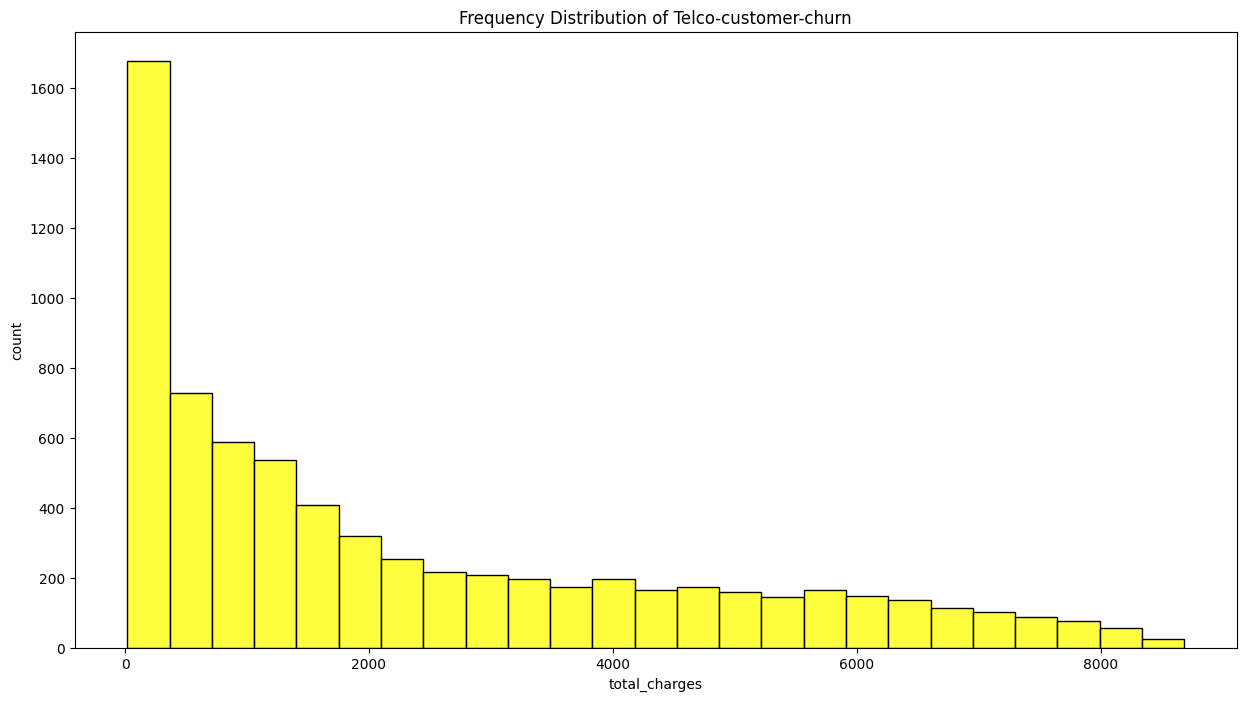

In [66]:
plt.figure(figsize=(15, 8))

plt.title('Frequency Distribution of Telco-customer-churn')
plt.xlabel('total_charges')
plt.ylabel('count') 

sns.histplot(df['totalcharges'][df['totalcharges'] < 100000], color='yellow') 

plt.show()

In [73]:
## log transformation 
log_price = np.log1p(df['totalcharges'])

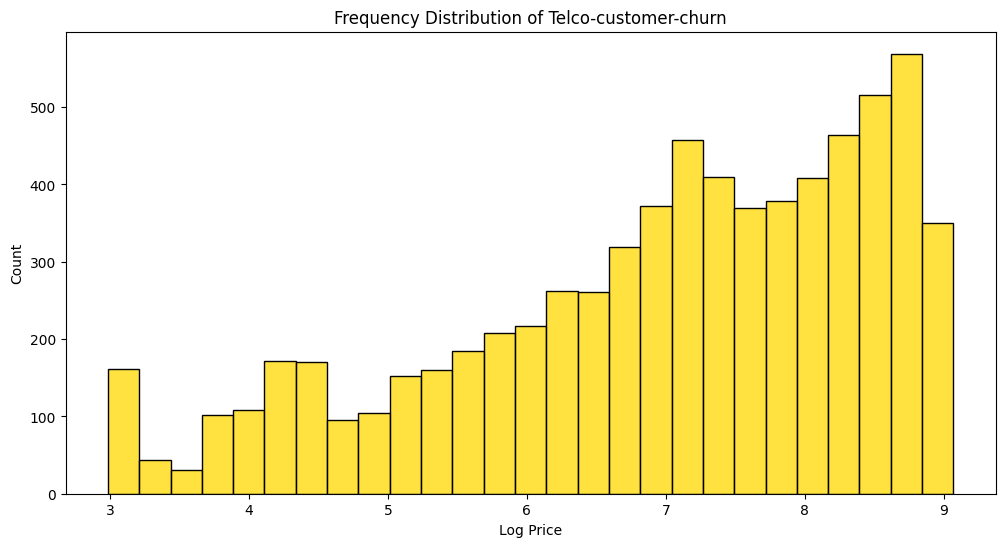

In [74]:
plt.figure(figsize=(12, 6))

plt.title('Frequency Distribution of Telco-customer-churn')
plt.xlabel('Log Price')
plt.ylabel('Count') 

sns.histplot(log_price, color='gold') 

plt.show()

       monthlycharges  totalcharges
count     7043.000000   7043.000000
mean        64.761692   2283.300441
std         30.090047   2265.000258
min         18.250000     18.800000
25%         35.500000    402.225000
50%         70.350000   1400.550000
75%         89.850000   3786.600000
max        118.750000   8684.800000


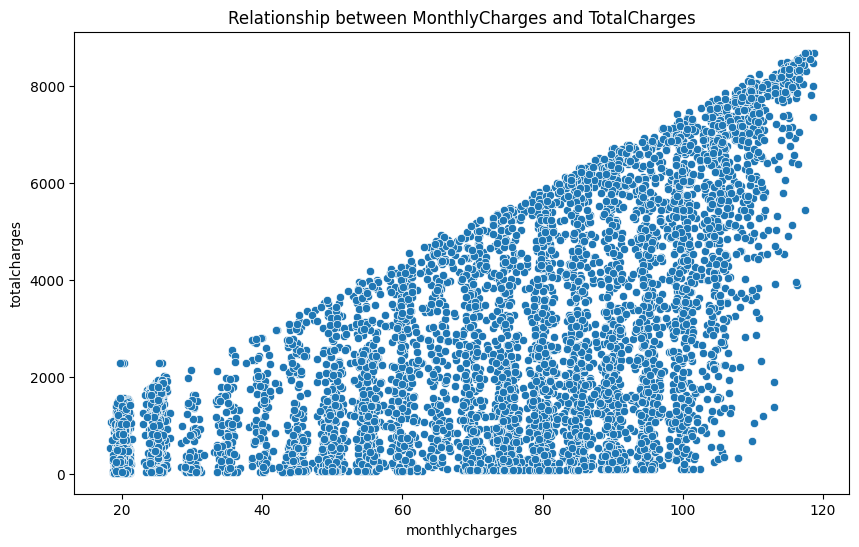

In [77]:
# Compare MonthlyCharges and TotalCharges
print(df[['monthlycharges', 'totalcharges']].describe())

# Visualize the relationship between MonthlyCharges and TotalCharges
plt.figure(figsize=(10,6))
sns.scatterplot(x='monthlycharges', y='totalcharges', data=df)
plt.title('Relationship between MonthlyCharges and TotalCharges')
plt.show()


## Outcome: there is a positive relationship between monthly charges and total charges.
##As monthly charges increases total charges also increases

In [72]:
# Check for outliers in numerical columns
##numerical_cols=df[gender: totalcharges]
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers in {col}: {len(outliers)}')



Outliers in seniorcitizen: 1142
Outliers in tenure: 0
Outliers in monthlycharges: 0
Outliers in totalcharges: 0
Outliers in churn: 0
